# Additional plots regarding the model configuration

In [2]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 1 folder(s) up.


In [3]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

## Load all networks

In [4]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


## Zones defined by aggregated clusters

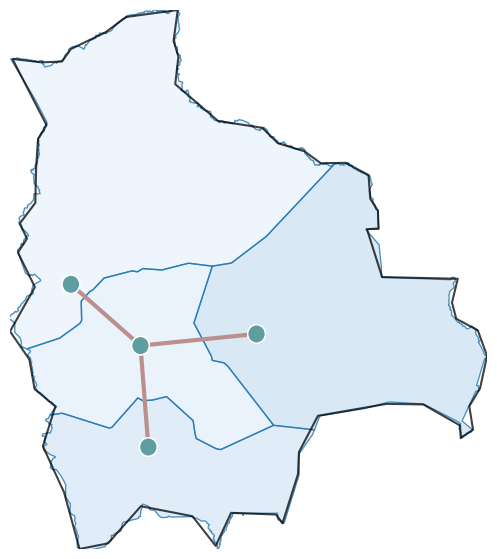

In [5]:
n = n_solve
c=4

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

cmap = "Blues"  # colormap for upper technology
red_linewidth = 3
red_bussizes = 5e-2
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)


#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")
country=shapes

r = gpd.read_file(
        f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
    ).set_index("name")
factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor
    
n.plot(
        color_geomap=False,
        bus_sizes=red_bussizes,
        line_widths=red_linewidth,
        ax=ax,
    )

r.boundary.plot(ax=ax, color="tab:blue", linewidth=1, alpha=0.8)
r.plot(ax=ax, column="factor", cmap=cmap, alpha=1, vmin=0, vmax=1)
country.boundary.plot(ax=ax, color="black", alpha=0.75)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# save the plot
#image_format = 'eps' # e.g .png, .svg, etc.
#fig.savefig('4zones_division_network.eps', format=image_format, dpi=1200)
plt.show()

## Voroni cells created by the initial set of buses

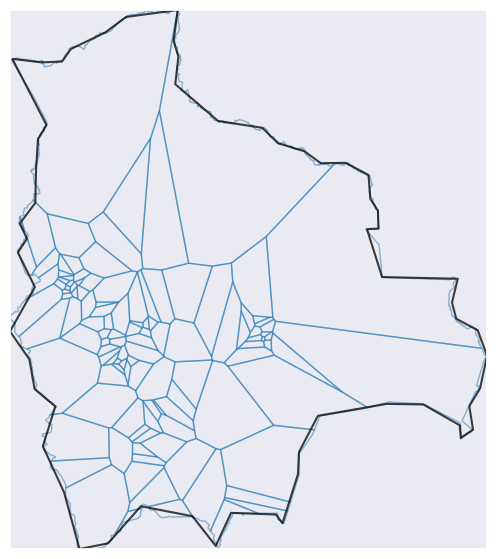

In [19]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
country=world[world.name.isin(["Bolivia"])].set_index("name")
shapes=country

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

r = gpd.read_file(
        f"resources/bus_regions/regions_onshore.geojson"
    ).set_index("name")


r.boundary.plot(ax=ax, color="tab:blue", linewidth=1, alpha=0.5)
country.boundary.plot(ax=ax, color="black", alpha=0.75)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# save the plot
#image_format = 'eps' # e.g .png, .svg, etc.
#fig.savefig('limits_hydro.eps', format=image_format, dpi=1200)

plt.show()

## Network comparison

INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores
c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


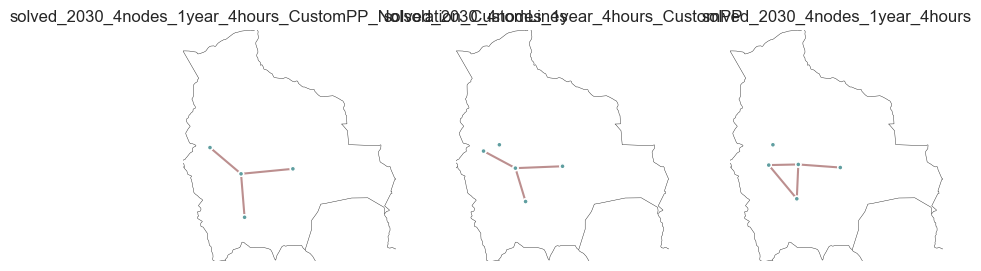

In [ ]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_final = os.getcwd() +  "/Result_analysis/2030_4N_1Y_4H_CPP_NIS_CL/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines = pypsa.Network(solved_final)

solved_mid = os.getcwd() +  "/Result_analysis/2030_BO_4Nodes_1year_4hours_NoCustomPP/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours_CustomPP = pypsa.Network(solved_mid)

solved_base = os.getcwd() +  "/Result_analysis/2030_BO_4Nodes_1year_4hours_WithCustomPP/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"
n_solved_2030_4nodes_1year_4hours = pypsa.Network(solved_base)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solved_2030_4nodes_1year_4hours_CustomPP.plot(ax=ax2)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

n_solved_2030_4nodes_1year_4hours.plot(ax=ax3)
ax3.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('solved_2030_4nodes_1year_4hours_CustomPP_NoIsolation_CustomLines')
ax2.set_title('solved_2030_4nodes_1year_4hours_CustomPP')
ax3.set_title('solved_2030_4nodes_1year_4hours')


# show the subplots
plt.savefig('clustered_comparison.png')
plt.show()